In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head(5)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
data.shape

(20800, 5)

In [5]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
data.dtypes

id         int64
title     object
author    object
text      object
label      int64
dtype: object

** We can see multiple null values here but for text type we can't impute the missing values so we will drop the missing values **

In [7]:
data=data.dropna()
data.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
data.shape

(18285, 5)

In [9]:
data.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [10]:
messages=data.copy()

** I am resetting the index because some missing values are deleted so the entire row will be deleted so that index also get deleted ***

In [11]:
messages.reset_index(inplace=True,drop=True)

In [12]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


# Data processing

In [13]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re


In [14]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [15]:

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [16]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [17]:

## TFidf Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X= vect.fit_transform(corpus).toarray()

In [18]:
X.shape

(18285, 13913)

In [19]:
y=messages['label']

In [20]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
#count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

In [22]:
#count_df.head(10)

In [23]:
from sklearn import svm

In [24]:
classifier= svm.LinearSVC()
classifier.fit(X_train,y_train)


LinearSVC()

In [25]:
from sklearn import metrics 

In [26]:
from sklearn.metrics import plot_confusion_matrix

In [27]:

pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:"+str(score))
print("F1 Score is :"+ str(metrics.f1_score(y_test, pred)))

accuracy:0.9261757200145826
F1 Score is :0.9172963038595059


          predicted_Spam  predicted_Not_Spam
Spam                2246                 156
Not_Spam             249                2835


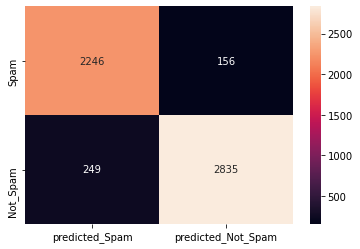

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['Spam', 'Not_Spam'],
                         columns=['predicted_Spam','predicted_Not_Spam'])
print(confusion)
sns.heatmap(confusion,annot=True,fmt="d")